Sample of notebook for OULAD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download dataset from https://analyse.kmi.open.ac.uk/open_dataset (anonymisedData.zip)

In [2]:
assessments = pd.read_csv('data/assessments.csv')
courses = pd.read_csv('data/courses.csv')
student_assessment = pd.read_csv('data/studentAssessment.csv')
student_info = pd.read_csv('data/studentInfo.csv')
student_registration = pd.read_csv('data/studentRegistration.csv')
student_vle = pd.read_csv('data/studentVle.csv')
vle = pd.read_csv('data/vle.csv')
vle.head(5)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


Basic operations

In [4]:
student_vle_grouped = student_vle.groupby(['id_student', 'code_module', 'code_presentation']).sum().drop(columns=['id_site', 'date'])
student_vle_grouped.head(6)

sum_click
id_student code_module code_presentation           
6516       AAA         2014J                   2791
8462       DDD         2013J                    646
                       2014J                     10
11391      AAA         2013J                    934
23629      BBB         2013B                    161
23698      CCC         2014J                    910

Merging student_vle and student_info

In [5]:
student_info_vle = pd.merge(student_info, student_vle_grouped, how='left', left_on=('id_student', 'code_module', 'code_presentation'), right_on=('id_student', 'code_module', 'code_presentation'))
student_info_vle.head(8)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034.0
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,2445.0
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass,1492.0
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass,1428.0


Merging assessment info

In [6]:
student_assessment_assessment = pd.merge(assessments, student_assessment, how='left', left_on=('id_assessment'), right_on=('id_assessment'))
student_assessment_assessment.head(2)

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391.0,18.0,0.0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400.0,22.0,0.0,70.0


Merging student_vle and student_assessment

In [7]:
info_vle_assessment = pd.merge(student_info_vle, student_assessment_assessment, how='left', left_on=('id_student', 'code_module', 'code_presentation'), right_on=('id_student', 'code_module', 'code_presentation'))
info_vle_assessment.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,1752.0,TMA,19.0,10.0,18.0,0.0,78.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,1753.0,TMA,54.0,20.0,53.0,0.0,85.0


Final merge with student_registration

In [8]:
aux = pd.merge(info_vle_assessment, student_registration, how='left', left_on=('id_student', 'code_module', 'code_presentation'), right_on=('id_student', 'code_module', 'code_presentation'))
aux.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'sum_click',
       'id_assessment', 'assessment_type', 'date', 'weight', 'date_submitted',
       'is_banked', 'score', 'date_registration', 'date_unregistration'],
      dtype='object')

Saving oulad info

In [9]:
aux.to_csv('oula.csv', header=True, index_label=False)

Loading dataframe

In [10]:
df = pd.read_csv('oula.csv')
df.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,sum_click,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,934.0,1752.0,TMA,19.0,10.0,18.0,0.0,78.0,-159.0,NaN
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,934.0,1753.0,TMA,54.0,20.0,53.0,0.0,85.0,-159.0,NaN


Displaying histogram for student assessment scores

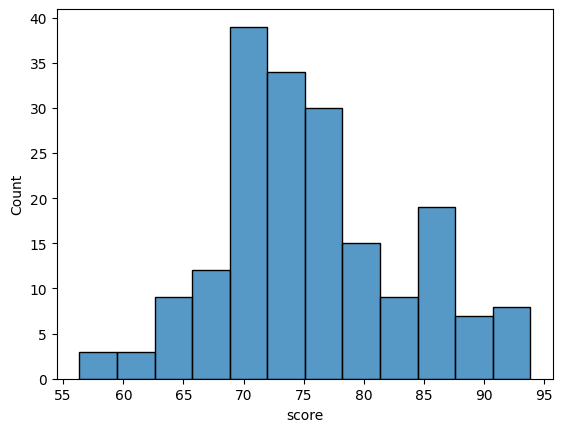

In [11]:
sns.histplot(df.groupby('id_assessment')['score'].mean());

Computing average number of assessments

In [12]:
df.groupby('id_student').count()['id_assessment'].mean()

6.041757859996526

Enabling performance comparison

In [13]:
def score_comparison(by):
  sns.boxplot(x=df[by].values, y=df['score'], palette='Blues')
  plt.xticks(rotation=45)
  plt.title(f'Comparing scores using {by}')
  plt.show()

Testing comparison by module (other criteria such as Gender or IMD)

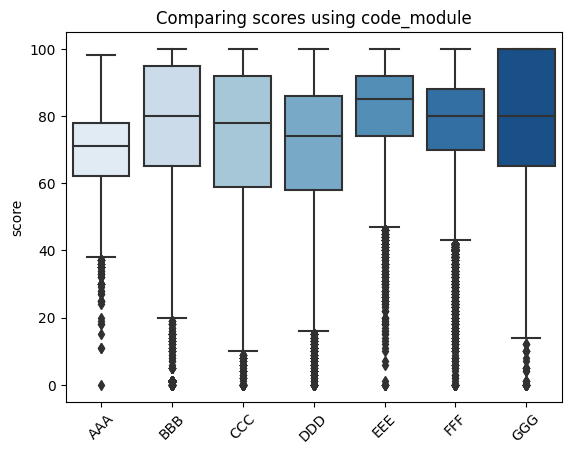

In [14]:
score_comparison('code_module')

Testing correlation

In [15]:
df['unregistered'] = df['date_unregistration'].notnull()

In [16]:
cr=df.corr(method='pearson')['score'].drop(index='score').sort_values(ascending=False)

/tmp/ipykernel_12309/3496145560.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr=df.corr(method='pearson')['score'].drop(index='score').sort_values(ascending=False)


Computing correlation values

In [17]:
crd=pd.merge(student_info,
               student_vle.groupby(["code_module", "code_presentation", "id_student"], as_index=False)[
                   'sum_click'].sum(),
               on=['code_module', 'code_presentation', 'id_student'])
crd.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435


Displaying correlation values; see also plt.matshow(dataset.corr()) or heatmap sns.heatmap(dataset.corr()) 

In [18]:
print(crd.corr())

                      id_student  num_of_prev_attempts  studied_credits  \
id_student              1.000000              0.014135        -0.005172   
num_of_prev_attempts    0.014135              1.000000         0.180897   
studied_credits        -0.005172              0.180897         1.000000   
sum_click               0.037327             -0.068865        -0.006473   

                      sum_click  
id_student             0.037327  
num_of_prev_attempts  -0.068865  
studied_credits       -0.006473  
sum_click              1.000000  


/tmp/ipykernel_12309/3891264294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(crd.corr())


/tmp/ipykernel_12309/2715297400.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crd.corr())


<Axes: >

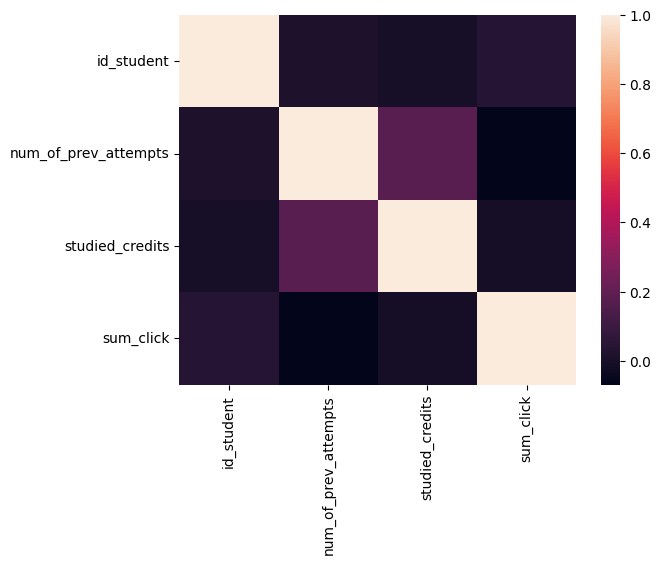

In [19]:
sns.heatmap(crd.corr())

More operations...

In [22]:
df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'sum_click',
       'id_assessment', 'assessment_type', 'date', 'weight', 'date_submitted',
       'is_banked', 'score', 'date_registration', 'date_unregistration',
       'unregistered'],
      dtype='object')

In [23]:
assessments.columns

Index(['code_module', 'code_presentation', 'id_assessment', 'assessment_type',
       'date', 'weight'],
      dtype='object')

In [24]:
student_assessment.columns

Index(['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score'], dtype='object')

In [25]:
courses.columns

Index(['code_module', 'code_presentation', 'module_presentation_length'], dtype='object')

In [26]:
student_info.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result'],
      dtype='object')

In [28]:
student_registration.columns

Index(['code_module', 'code_presentation', 'id_student', 'date_registration',
       'date_unregistration'],
      dtype='object')

In [29]:
student_vle.columns

Index(['code_module', 'code_presentation', 'id_student', 'id_site', 'date',
       'sum_click'],
      dtype='object')

In [30]:
vle.columns

Index(['id_site', 'code_module', 'code_presentation', 'activity_type',
       'week_from', 'week_to'],
      dtype='object')

In [57]:
student_assessment_assessment.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391.0,18.0,0.0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400.0,22.0,0.0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604.0,17.0,0.0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885.0,26.0,0.0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053.0,19.0,0.0,79.0


In [58]:
modules_group = student_assessment_assessment.groupby('code_module')
modules_group.mean(numeric_only=True)["score"]

code_module
AAA    69.030515
BBB    76.706368
CCC    73.261398
DDD    70.090800
EEE    81.180066
FFF    77.707590
GGG    79.700493
Name: score, dtype: float64

In [59]:
modules_group.sum(numeric_only=True)["weight"]

code_module
AAA     61980.0
BBB    450773.0
CCC    376640.0
DDD    660926.0
EEE    193848.0
FFF    473650.0
GGG       300.0
Name: weight, dtype: float64

In [63]:
student_assessment.groupby('id_student').sum()

,id_assessment,date_submitted,is_banked,score
id_student,,,,
6516,8800,558,0,309.0
8462,177501,161,4,609.0
11391,8770,562,0,410.0
23629,59952,223,0,330.0
23698,218655,1201,0,670.0
...,...,...,...,...
2698251,177506,850,0,407.0
2698257,8770,581,0,339.0
2698535,219986,723,0,314.0
